In [1]:
#Plot yields without the equilibrium values
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from thermal.equilibriumDensities import Yeq
from tools.modelData import ModelData


### Plot solution

In [2]:
output_file = '../test_output/solution.csv'

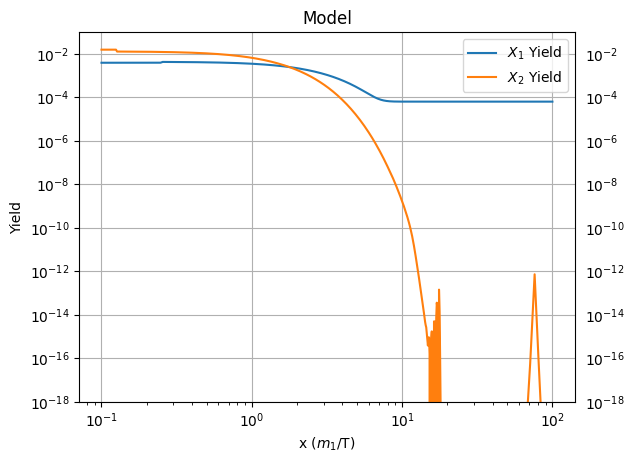

In [3]:
data = pd.read_csv(output_file) #reading the data from the solution
x = data['# x']
sol_dm = data['Y(xm)']
sol_mediator = data['Y(b2)']

#plot
plt.plot(x, sol_dm, label=r'$X_1$ Yield')
plt.plot(x, sol_mediator, label=r'$X_2$ Yield')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labeltop=False, labelright=True)
plt.title(r'Model')
plt.xlabel(r'x ($m_1$/T)')
plt.ylabel(r'Yield')
plt.ylim(10**(-18), 10**(-1))
plt.grid()
plt.legend()
plt.show()

### Add equilibrium yields

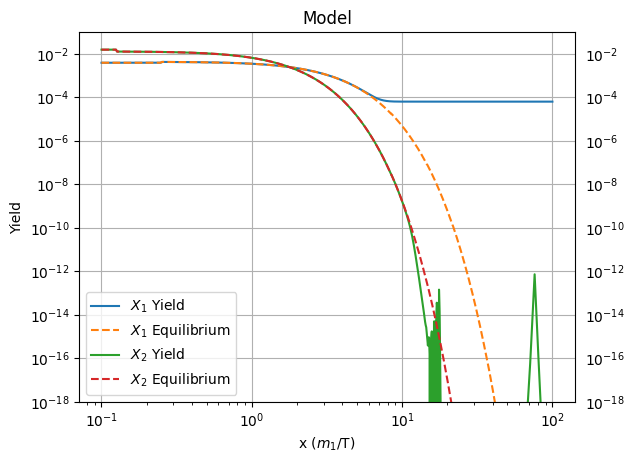

In [20]:

model = ModelData(dmPDG=52,bsmPDGList=[52,2000005],
                  bannerFile='../test_output/darkcalc_banner.txt')
mDM = model.mDM #DM mass
m_med = model.componentsDict[2000005].mass #mediator mass
gDM = model.componentsDict[52].g(mDM) #DM degrees of freedom
g_med = model.componentsDict[2000005].g(mDM) #mediator degrees of freedom, negative since it is a boson
equilibrium_dm = list() #list to keep the equilibrium values for DM
equilibrium_med = list() #list to keep the equilibrium values for the mediator
for i in range(0, len(x)):
    T = mDM/x[i] #temperature in GeV
    dm_value = Yeq(T, mDM, gDM)
    equilibrium_dm.append(dm_value)
    med_value = Yeq(T, m_med, g_med)
    equilibrium_med.append(med_value)

#plot
plt.plot(x, sol_dm, label=r'$X_1$ Yield')
plt.plot(x, equilibrium_dm, label=r'$X_1$ Equilibrium', linestyle='dashed')
plt.plot(x, sol_mediator, label=r'$X_2$ Yield')
plt.plot(x, equilibrium_med, label=r'$X_2$ Equilibrium', linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labeltop=False, labelright=True)
plt.title(r'Model')
plt.xlabel(r'x ($m_1$/T)')
plt.ylabel(r'Yield')
plt.ylim(10**(-18), 10**(-1))
name = 'solution'
plt.grid()
plt.legend()
plt.show()